In [45]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.io import loadmat

def load_data(file_name):
    mat_data = loadmat(f'dataLDA/{file_name}.mat')

    x_array = mat_data['X']
    y_array = mat_data['Y']

    x_numpy_array = np.array(x_array)
    y_numpy_array = np.array(y_array)
    return x_numpy_array, y_numpy_array

def load_data_5d(file_name, x_key, y_key):
    mat_data = loadmat(f'dataLDA/{file_name}.mat')

    x_array = mat_data[x_key]
    y_array = mat_data[y_key]

    x_numpy_array = np.array(x_array)
    y_numpy_array = np.array(y_array)
    return x_numpy_array, y_numpy_array

def calc_x_tilde(training_x):
    new_row = np.ones((1, training_x.shape[1]), dtype=int)
    new_matrix = np.insert(training_x, 0, new_row, axis=0)
    return new_matrix

def calc_minus_l(training_x_tilde, training_y,theta):
    n=training_y.shape[1]
    l = 0
    for i in range(n):
        l += training_y[0,i]*np.dot(theta,training_x_tilde[:,i])-np.log(1+np.exp(-np.dot(theta,training_x_tilde[:,i])))
    return -l

def calc_gradient(training_x_tilde, training_y,theta):
    n=training_y.shape[1]
    gradient=0
    for i in range(n):
        gradient += training_x_tilde[:,i]*(training_y[0,i]-(1/(1+np.exp(-np.dot(theta,training_x_tilde[:,i])))))
    return -gradient

def calc_gradient_decent(training_x_tilde,training_y,alpha,theta,epsilon,iteration_max):
    l_history = np.zeros(iteration_max)
    delta_l_history =np.zeros(iteration_max)
    number = 0
    for i in range(iteration_max):
        l = calc_minus_l(training_x_tilde, training_y,theta)
        l_history[i] = l
        gradient = calc_gradient(training_x_tilde, training_y,theta)
        delta_l_history[i]=np.linalg.norm(gradient)
        if(np.linalg.norm(gradient)<epsilon):
            return l_history, theta,delta_l_history,i
        theta = theta - alpha*gradient
        number = i

    return l_history, theta,delta_l_history,number

def Gradient_Descent_classifier(theta,testing_x):
    testing_x_tilde=np.insert(testing_x, 0, 1)
    value = np.dot(theta,testing_x_tilde)
    if (value>=0):
        return 1
    else:
        return 0

def Gradient_Descent_classifier_function(theta,x):
    return -theta[0]/theta[2]-theta[1]*x/theta[2]

def calc_stochastic_gradient(training_x_tilde, training_y, theta):
    n = training_y.shape[1]
    gradient = 0
    rand_index = np.random.randint(0, n)
    gradient += training_x_tilde[:, rand_index] * (
                training_y[0, rand_index] - (1 / (1 + np.exp(-np.dot(theta, training_x_tilde[:, rand_index])))))
    return -gradient


def calc_stochastic_gradient_decent(training_x_tilde, training_y, alpha, theta, epsilon, iteration_max):
    l_history = np.zeros(iteration_max)
    delta_l_history = np.zeros(iteration_max)
    number = 0
    for i in range(iteration_max):
        l = calc_minus_l(training_x_tilde, training_y, theta)
        l_history[i] = l
        gradient = calc_stochastic_gradient(training_x_tilde, training_y, theta)
        delta_l_history[i] = np.linalg.norm(gradient)
        if (np.linalg.norm(gradient) < epsilon):
            return l_history, theta, delta_l_history, i
        theta = theta - alpha * gradient
        number = i
    return l_history, theta, delta_l_history, number


## Data 1

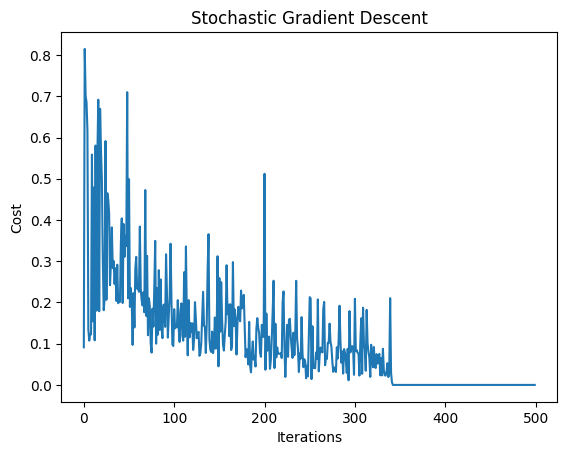

alpha =  0.2
theta =  [-2.86025208  3.08982334  3.08701413]
iteration_time =  341
risk: 0.0
__header__
__version__
__globals__
X
Y


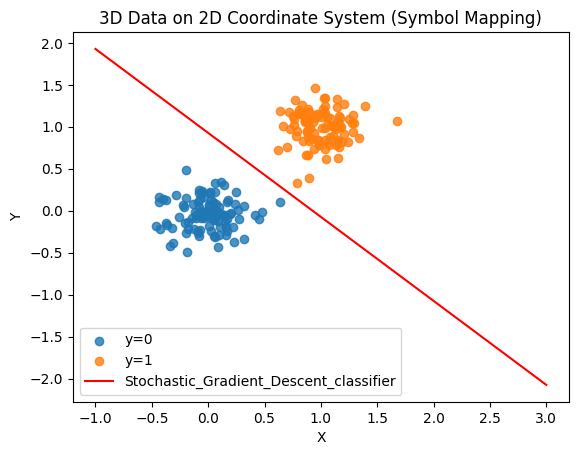

In [46]:
file_name = 'synthetic1'
training_x, training_y = load_data(file_name)
d = training_x.shape[0]
n = training_x.shape[1]
theta = np.ones(d+1)
# theta = np.random.randn(1,d + 1)
alpha = 0.2
epsilon = 0.01
iteration_max = 500
training_x_tilde = calc_x_tilde(training_x)

l_history, theta, delta_l_history, iteration_time = calc_stochastic_gradient_decent(training_x_tilde, training_y, alpha, theta,
                                                                         epsilon, iteration_max)

training_y_hat = np.zeros(n)
for i in range(n):
    training_y_hat[i] = Gradient_Descent_classifier(theta, training_x[:, i])

risk = np.sum(training_y_hat != training_y[0, :]) / n
plt.plot(range(iteration_max), delta_l_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Stochastic Gradient Descent')
plt.show()
print('alpha = ', alpha)
print('theta = ', theta)
print('iteration_time = ', iteration_time)
print('risk:', risk)

from scipy.io import loadmat
import numpy as np

# Load the MATLAB file
mat_data = loadmat('dataLDA/synthetic1.mat')

# Access variables in the MATLAB file
# The variables are stored as keys in the dictionary
for key in mat_data:
   print(key)   # Print the variable names

# Access a specific variable from the MATLAB file
x_array = mat_data['X']
y_array = mat_data['Y']

# Convert the MATLAB variable to a NumPy array
x_numpy_array = np.array(x_array)
y_numpy_array = np.array(y_array)

# Perform some operations on the array
mean_value = np.mean(y_numpy_array)
max_value = np.max(y_numpy_array)

# Prepare coordinate data
x0 = x_numpy_array[0]
x1 = x_numpy_array[1]
y = y_numpy_array[0]

for i in range(2):
    plt.scatter(x0[y == i], x1[y == i], label=f'y={i}', alpha=0.8)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('3D Data on 2D Coordinate System (Symbol Mapping)')
# plt.show()

x_value=np.linspace(-1,3,500);
g1_value=[Gradient_Descent_classifier_function(theta,x) for x in x_value]
plt.plot(x_value,g1_value,label='Stochastic_Gradient_Descent_classifier',color='r');
plt.legend()
plt.show()

## Data 2

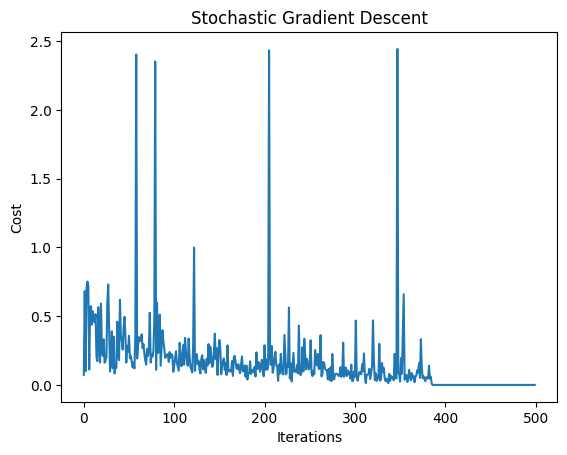

alpha =  0.2
theta =  [-2.63415495  2.51678889  3.42014332]
iteration_time =  385
risk: 0.01
__header__
__version__
__globals__
X
Y
w
b


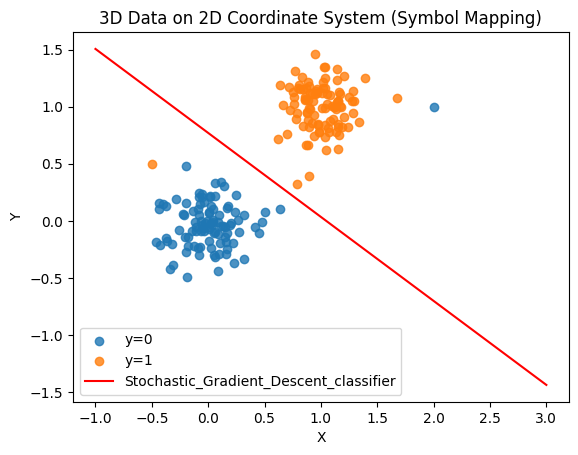

In [47]:
file_name = 'synthetic2'
training_x, training_y = load_data(file_name)
d = training_x.shape[0]
n = training_x.shape[1]
theta = np.ones(d+1)
# theta = np.random.randn(1,d + 1)
alpha = 0.2
epsilon = 0.01
iteration_max = 500
training_x_tilde = calc_x_tilde(training_x)

l_history, theta, delta_l_history, iteration_time = calc_stochastic_gradient_decent(training_x_tilde, training_y, alpha, theta,
                                                                         epsilon, iteration_max)

training_y_hat = np.zeros(n)
for i in range(n):
    training_y_hat[i] = Gradient_Descent_classifier(theta, training_x[:, i])

risk = np.sum(training_y_hat != training_y[0, :]) / n
plt.plot(range(iteration_max), delta_l_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Stochastic Gradient Descent')
plt.show()
print('alpha = ', alpha)
print('theta = ', theta)
print('iteration_time = ', iteration_time)
print('risk:', risk)

from scipy.io import loadmat
import numpy as np

# Load the MATLAB file
mat_data = loadmat('dataLDA/synthetic2.mat')

# Access variables in the MATLAB file
# The variables are stored as keys in the dictionary
for key in mat_data:
   print(key)   # Print the variable names

# Access a specific variable from the MATLAB file
x_array = mat_data['X']
y_array = mat_data['Y']

# Convert the MATLAB variable to a NumPy array
x_numpy_array = np.array(x_array)
y_numpy_array = np.array(y_array)

# Perform some operations on the array
mean_value = np.mean(y_numpy_array)
max_value = np.max(y_numpy_array)

# Prepare coordinate data
x0 = x_numpy_array[0]
x1 = x_numpy_array[1]
y = y_numpy_array[0]

for i in range(2):
    plt.scatter(x0[y == i], x1[y == i], label=f'y={i}', alpha=0.8)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('3D Data on 2D Coordinate System (Symbol Mapping)')
# plt.show()

x_value=np.linspace(-1,3,500);
g1_value=[Gradient_Descent_classifier_function(theta,x) for x in x_value]
plt.plot(x_value,g1_value,label='Stochastic_Gradient_Descent_classifier',color='r');
plt.legend()
plt.show()

## Data 3

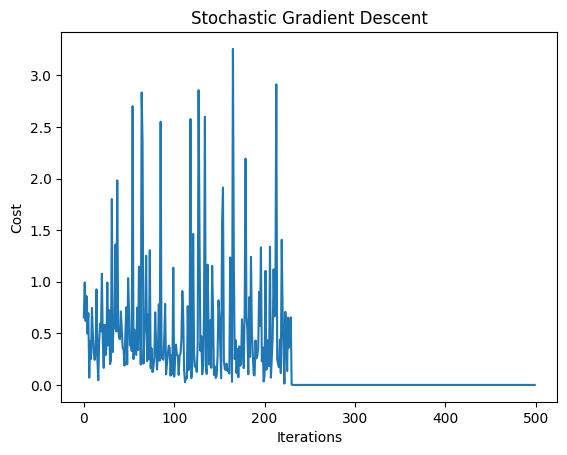

alpha =  0.2
theta =  [-0.77182672  0.70989542  2.79352628]
iteration_time =  230
risk: 0.205
__header__
__version__
__globals__
X
Y


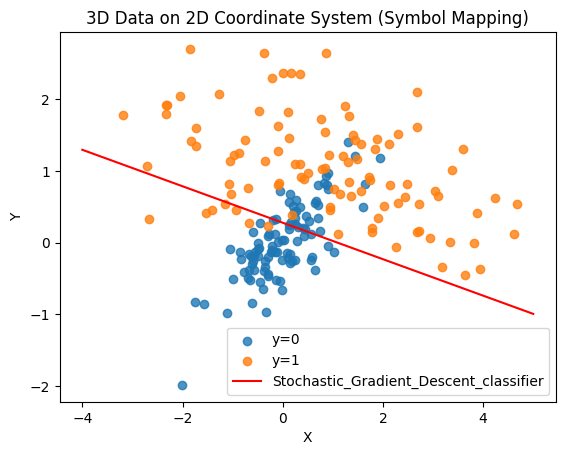

In [51]:
file_name = 'synthetic3'
training_x, training_y = load_data(file_name)
d = training_x.shape[0]
n = training_x.shape[1]
theta = np.ones(d+1)
# theta = np.random.randn(1,d + 1)
alpha = 0.2
epsilon = 0.01
iteration_max = 500
training_x_tilde = calc_x_tilde(training_x)

l_history, theta, delta_l_history, iteration_time = calc_stochastic_gradient_decent(training_x_tilde, training_y, alpha, theta,
                                                                         epsilon, iteration_max)

training_y_hat = np.zeros(n)
for i in range(n):
    training_y_hat[i] = Gradient_Descent_classifier(theta, training_x[:, i])

risk = np.sum(training_y_hat != training_y[0, :]) / n
plt.plot(range(iteration_max), delta_l_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Stochastic Gradient Descent')
plt.show()
print('alpha = ', alpha)
print('theta = ', theta)
print('iteration_time = ', iteration_time)
print('risk:', risk)

from scipy.io import loadmat
import numpy as np

# Load the MATLAB file
mat_data = loadmat('dataLDA/synthetic3.mat')

# Access variables in the MATLAB file
# The variables are stored as keys in the dictionary
for key in mat_data:
   print(key)   # Print the variable names

# Access a specific variable from the MATLAB file
x_array = mat_data['X']
y_array = mat_data['Y']

# Convert the MATLAB variable to a NumPy array
x_numpy_array = np.array(x_array)
y_numpy_array = np.array(y_array)

# Perform some operations on the array
mean_value = np.mean(y_numpy_array)
max_value = np.max(y_numpy_array)

# Prepare coordinate data
x0 = x_numpy_array[0]
x1 = x_numpy_array[1]
y = y_numpy_array[0]

for i in range(2):
    plt.scatter(x0[y == i], x1[y == i], label=f'y={i}', alpha=0.8)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('3D Data on 2D Coordinate System (Symbol Mapping)')
# plt.show()

x_value=np.linspace(-4,5,500);
g1_value=[Gradient_Descent_classifier_function(theta,x) for x in x_value]
plt.plot(x_value,g1_value,label='Stochastic_Gradient_Descent_classifier',color='r');
plt.legend()
plt.show()

## Data 4

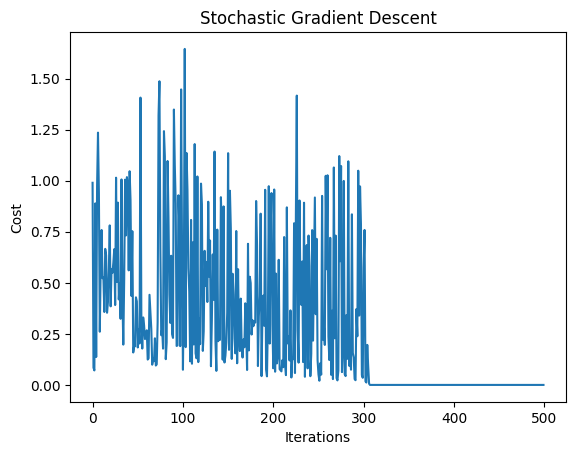

alpha =  0.2
theta =  [-3.58017071  1.79170403  1.72275308]
iteration_time =  306
risk: 0.175
__header__
__version__
__globals__
X
Y


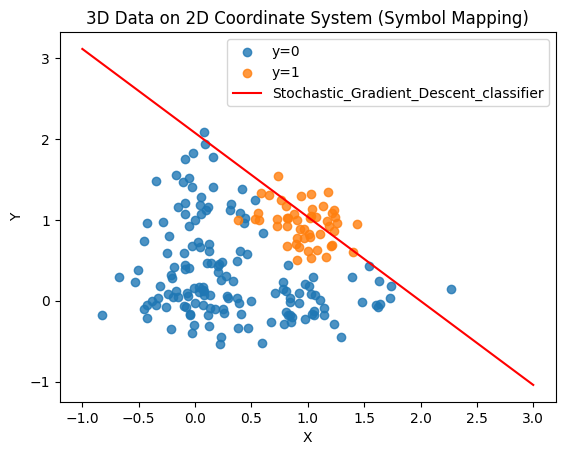

In [52]:
file_name = 'synthetic4'
training_x, training_y = load_data(file_name)
d = training_x.shape[0]
n = training_x.shape[1]
theta = np.ones(d+1)
# theta = np.random.randn(1,d + 1)
alpha = 0.2
epsilon = 0.01
iteration_max = 500
training_x_tilde = calc_x_tilde(training_x)

l_history, theta, delta_l_history, iteration_time = calc_stochastic_gradient_decent(training_x_tilde, training_y, alpha, theta,
                                                                         epsilon, iteration_max)

training_y_hat = np.zeros(n)
for i in range(n):
    training_y_hat[i] = Gradient_Descent_classifier(theta, training_x[:, i])

risk = np.sum(training_y_hat != training_y[0, :]) / n
plt.plot(range(iteration_max), delta_l_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Stochastic Gradient Descent')
plt.show()
print('alpha = ', alpha)
print('theta = ', theta)
print('iteration_time = ', iteration_time)
print('risk:', risk)

from scipy.io import loadmat
import numpy as np

# Load the MATLAB file
mat_data = loadmat('dataLDA/synthetic4.mat')

# Access variables in the MATLAB file
# The variables are stored as keys in the dictionary
for key in mat_data:
   print(key)   # Print the variable names

# Access a specific variable from the MATLAB file
x_array = mat_data['X']
y_array = mat_data['Y']

# Convert the MATLAB variable to a NumPy array
x_numpy_array = np.array(x_array)
y_numpy_array = np.array(y_array)

# Perform some operations on the array
mean_value = np.mean(y_numpy_array)
max_value = np.max(y_numpy_array)

# Prepare coordinate data
x0 = x_numpy_array[0]
x1 = x_numpy_array[1]
y = y_numpy_array[0]

for i in range(2):
    plt.scatter(x0[y == i], x1[y == i], label=f'y={i}', alpha=0.8)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('3D Data on 2D Coordinate System (Symbol Mapping)')
# plt.show()

x_value=np.linspace(-1,3,500);
g1_value=[Gradient_Descent_classifier_function(theta,x) for x in x_value]
plt.plot(x_value,g1_value,label='Stochastic_Gradient_Descent_classifier',color='r');
plt.legend()
plt.show()